In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('Medical_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(2772, 7)

In [5]:
df['region'].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


<Axes: ylabel='count'>

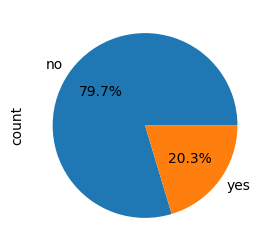

In [7]:
plt.figure(figsize=(8,3))
df['smoker'].value_counts().plot(kind='pie',  autopct='%1.1f%%')

Text(0.5, 1.0, 'Smoker Distribution')

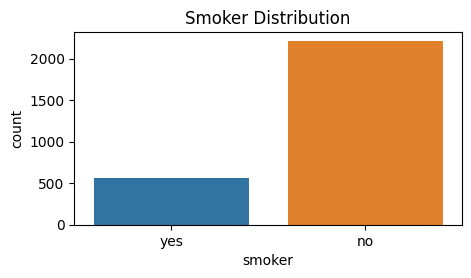

In [8]:
plt.figure(figsize=(5,2.5))
# sns.color_palette('Set2')
sns.countplot(x='smoker', data=df, hue='smoker')
plt.title('Smoker Distribution')

Text(0.5, 1.0, 'Gender Distribution')

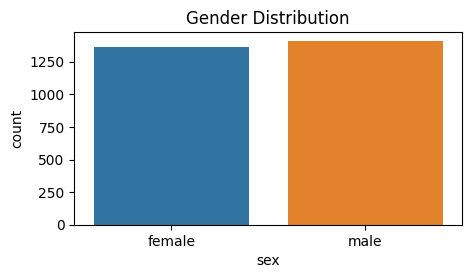

In [9]:
plt.figure(figsize=(5,2.5))
# sns.color_palette('Set2')
sns.countplot(x='sex', data=df, hue='sex')
plt.title('Gender Distribution')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [11]:
def modidy_data(text):
    if text == 'female':
        return 0
    else:
        return 1

In [12]:
df['sex'] = df['sex'].apply(modidy_data)

In [13]:
def modidy_data(text):
    if text == 'no':
        return 0
    else:
        return 1

In [14]:
df['smoker'] = df['smoker'].apply(modidy_data)

In [15]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
df.duplicated().sum().item()

1435

In [17]:
df.corr(numeric_only=True)['charges']

age         0.298624
sex         0.062837
bmi         0.199846
children    0.066442
smoker      0.788783
charges     1.000000
Name: charges, dtype: float64

In [ ]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

In [ ]:
categorical_cols = ['region']
numerical_cols = ['age', 'sex','smoker','bmi', 'children']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # drop='first' to avoid dummy trap
    ],
    remainder='passthrough'  # keep numerical columns as is
)

In [ ]:
model = RandomForestRegressor(random_state=42)

In [ ]:

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:

y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9506


In [26]:
def predict_insurance(age, sex,bmi, children, smoker, region):
    if isinstance(sex, str):
        if sex.lower() == 'male':
            sex = 1
        elif sex.lower() == 'female':
            sex = 0

    if isinstance(smoker, str):
        if smoker.lower() in ['yes', 'y']:
            smoker = 1
        elif smoker.lower() in ['no', 'not', 'n']:
            smoker = 0

    original_value = pd.DataFrame([{
        'age': age,
        'sex': sex,
        'bmi': bmi,
        'children': children,
        'smoker': smoker,
        'region': region
    }])
    result = pipeline.predict(original_value)
    print(f"💰 Predicted Insurance per years: ${result[0]:,.2f}")
    

In [27]:
predict_insurance(age=55, sex='Male',bmi=22.3,children=2,smoker='Yes', region='northeast')

💰 Predicted Insurance per years: $24,325.58


In [28]:
import pickle

In [29]:
with open('predict_insurance.pkl', 'wb') as f1:
    pickle.dump(pipeline,f1)

with open('insurance_accuracy.pkl', 'wb') as f2:
    pickle.dump(r2,f2)


In [30]:
values = [33, 'Male', 30.2, 2, 'Yes', 'southeast']

if 'Male' in values:
    values[values.index('Male')] = 1
if 'Yes' in values:
    values[values.index('Yes')] = 1
if 'Female' in values:
    values[values.index('Female')] = 0
if 'Not' in values:
    values[values.index('Not')] = 0

print(values)


[33, 1, 30.2, 2, 1, 'southeast']


In [31]:
df.sample(3)

,age,sex,bmi,children,smoker,region,charges
2042,26,0,42.400,1,0,southwest,3410.32400
1257,54,0,27.645,1,0,northwest,11305.93455
618,19,0,33.110,0,1,southeast,34439.85590
